<a href="https://colab.research.google.com/github/SKS200/Skin-cancer-classification/blob/main/sks_SkinCancer_VGG%2BRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras.models import Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/MyDrive/Skin")

In [ ]:
#data path
trainpath = '/content/drive/MyDrive/Skin/data/train/'
testpath = '/content/drive/MyDrive/Skin/data/test/'

Reading Images for Train Data </h3>

1.   List item
2.   List item


In [ ]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#Entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])
      

Entering to the folder name: benign
Number of images in the folder is 2028
Entering to the folder name: malignant
Number of images in the folder is 1773


In [ ]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(trainpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 499
Entering to the folder name: malignant
Number of images in the folder is 433


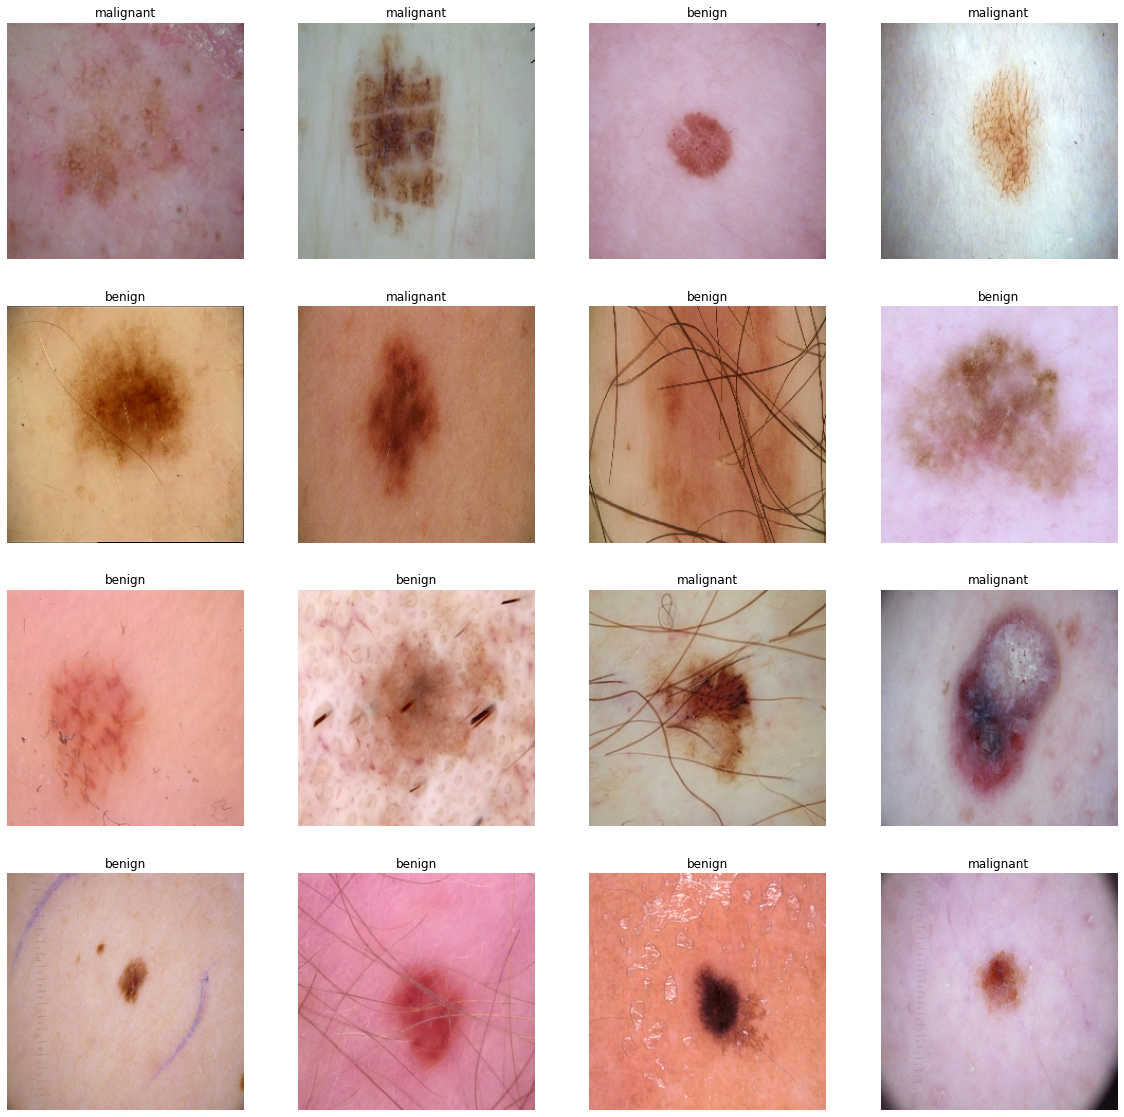

In [ ]:
def plotting_train_images_and_train_labels(train_images,train_labels):
  plt.figure(figsize=(20,20))
  temp_var=list(np.random.randint(0,len(train_images ),16))
  for n , i in enumerate(temp_var):
    plt.subplot(4,4,n+1)
    plt.imshow(train_images [i])   
    plt.axis('off')
    class_cancer = {'benign': 0, 'malignant': 1}
    def Class_Label(n):
      for p,q in class_cancer.items():
        if n==q:
          return p
    plt.title(Class_Label(train_labels[i]))

plotting_train_images_and_train_labels(train_images,train_labels)

  

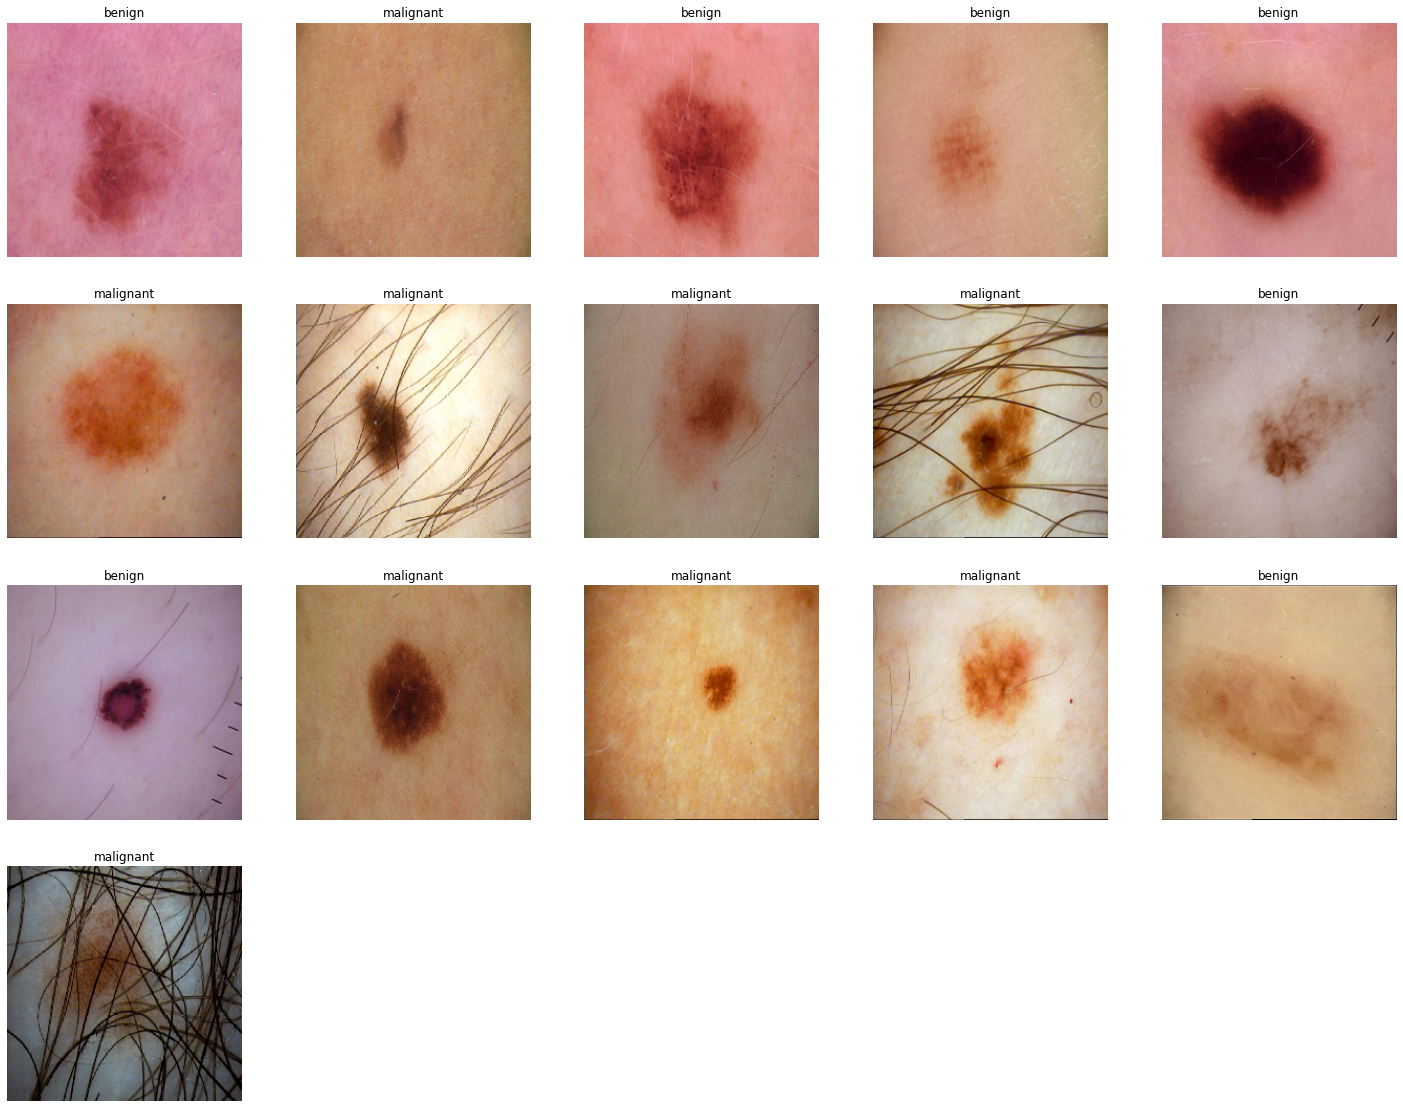

In [ ]:
def plotting_test_images_and_test_labels(test_images,test_labels):
  plt.figure(figsize=(25,25))
  temp_var=list(np.random.randint(0,len(test_images),16))
  for n , i in enumerate(temp_var):
    plt.subplot(5,5,n+1)
    plt.imshow(train_images [i])   
    plt.axis('off')
    class_cancer = {'benign': 0, 'malignant': 1}
    def Class_Label(n):
      for p,q in class_cancer.items():
        if n==q:
          return p
    plt.title(Class_Label(test_labels[i]))

plotting_test_images_and_test_labels(test_images,test_labels)


In [ ]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)



In [ ]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*50)
print(X_test.shape)
print(y_test.shape)

(3801, 224, 224, 3)
********************
(3801,)
**************************************************
(932, 224, 224, 3)
(932,)


In [ ]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)

y_train,y_test=keras_to_categorical(y_train,y_test)

In [ ]:
y_train.shape,y_test.shape

((3801, 2), (932, 2))

Feature Extraction of VGG-16

In [ ]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE=model_vgg16()

In [ ]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=128,kernel_initializer="glorot_uniform",activation='relu')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='sigmoid')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
  ##output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model=model_vgg16()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))

In [ ]:
predictions = model.predict(X_test) 
y_pred = (predictions > 0.5) 
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
matrix